In [545]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

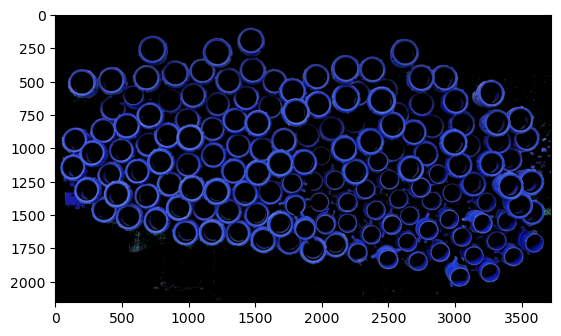

In [546]:
image = cv2.imread('pipe.jpeg')

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_orange = np.array([0, 100, 50])
upper_orange = np.array([70, 255, 255])
mask = cv2.inRange(hsv, lower_orange, upper_orange)
filtered = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(filtered, cmap='gray');


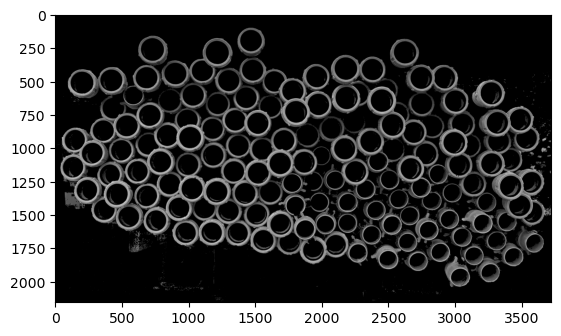

In [547]:
gray = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray');

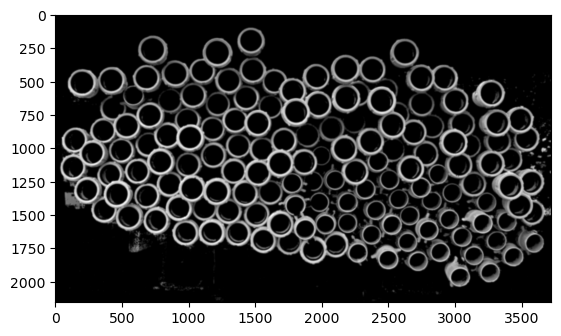

In [548]:
blur = cv2.GaussianBlur(gray, (21,21), 0)
plt.imshow(blur, cmap='gray')

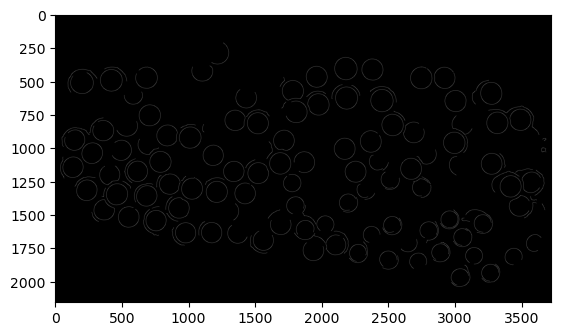

In [553]:
canny = cv2.Canny(blur, 30, 150, 1)
plt.imshow(canny, cmap='gray')

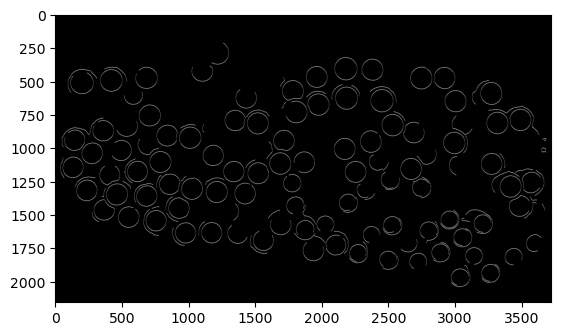

In [554]:
dilated = cv2.dilate(canny, (1,1), iterations = 2)
plt.imshow(dilated, cmap='gray')

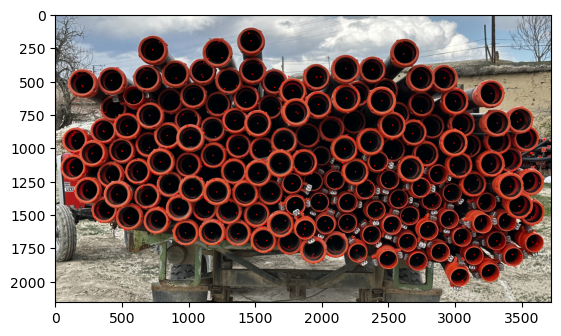

In [555]:
(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0), 2)

# Her bir konturun merkezini hesaplayın ve çevresine bir nokta yerleştirin
for c in cnt:
    # Konturun merkezini hesaplayın
    M = cv2.moments(c)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    # Konturun merkezine bir nokta yerleştirin
    cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [556]:

        

print('Pipes in the image:', len(cnt))

Pipes in the image: 176
